In [63]:
#In this part of the program are the most important functions that we are going to need.
#Please run this cell before any other, in order to achieve the availability of the functions.

import numpy as np
import pandas

def read_data(filename):
    df=pandas.read_csv("./rawData/"+str(filename)) #loading the file
    t_start = np.array(df["Start"])[0].astype(float) #time of starting the experiment
    t_step = np.array(df["Increment"])[0].astype(float) #timesteps (to be multiplied with the first column)
    element=np.array(df["X"])[1:].astype(float) #simply an element of a measure sequence
    ch1=np.array(df["CH1"])[1:].astype(float) #data of ch1 in V
    ch2=np.array(df["CH2"])[1:].astype(float) #data of ch2 in V

    return ch1, ch2, t_start, t_step, element


The filenames of the files with raw data, that is going to be needed in the excercises is listed here
FET Kennlinie(4.1):
NewFile13v.csv for 3V
NewFile16v.csv for 6V
NewFile10v.csv for 10V

Charakterisierung OPV(4.2):
    invertierender Verstärker:
        NewFile10kinv.csv for 10kohm, with U_E=1V
        NewFile100kinv.csv for 100kohm, with U_E=1V
        NewFile100kinv500.csv for 100kohm, 0.5V
        NewFile100kiv250.csv for 100kohm, 0.25V

    Nicht-invertierter Verstärker(Sinus):
        NewFile1ninv250.csv, with U_E=0.25
        NewFile1ninv500.csv, 0.5
        NewFile1ninv1000.csv, 0.5

    Integrierer:
        NewFile1c250s.csv sinus 0.25V
        NewFile1c500s.csv sinus 0.5V
        NewFile1c1s.csv sinus 1V
        NewFile1c75r.csv rechteck 0.075V
        NewFile1c5r.csv rechteck 0.05V
        NewFile1c1r.csv rechteck 0.1V
        

Data analysis of EX 1 FET:
plot X/Y of CH1/CH2 for 3V, 6V, 10V

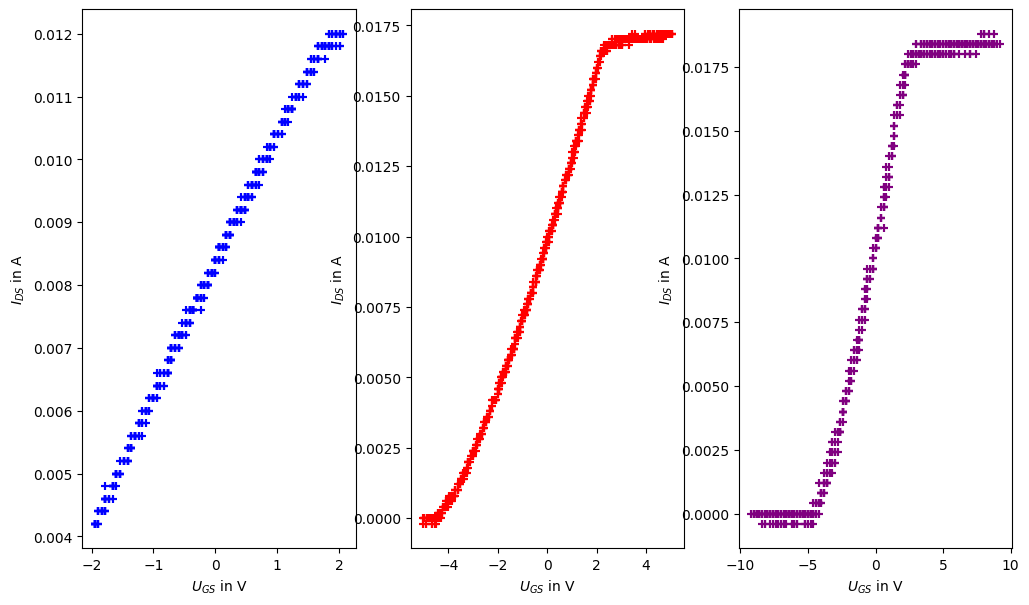

In [79]:
filename1="NewFile13v.csv"
filename2="NewFile16v.csv"
filename3="NewFile10v.csv"

(ch1_1, ch2_1, t_start_1, t_step_1, element_1)=read_data(filename1)
(ch1_2, ch2_2, t_start_2, t_step_2, element_2)=read_data(filename2)
(ch1_3, ch2_3, t_start_3, t_step_3, element_3)=read_data(filename3)

import matplotlib.pyplot as plt
fig, axs=plt.subplots(1, 3, figsize=(12, 7)) #defining figure object

#U_GS=+-2V
axs[0].scatter(ch1_1, ch2_1/100, color="blue", marker="+") #division with R=100 because we want the current
axs[0].set_ylabel(r"$I_{DS}$ in A")
axs[0].set_xlabel(r"$U_{GS}$ in V")

#U_GS=+-5V
axs[1].scatter(ch1_2, ch2_2/100, color="red", marker="+") #division with R=100 because we want the current
axs[1].set_ylabel(r"$I_{DS}$ in A")
axs[1].set_xlabel(r"$U_{GS}$ in V")

#U_GS=+-9V
axs[2].scatter(ch1_3, ch2_3/100, color="purple", marker="+") #division with R=100 because we want the current
axs[2].set_ylabel(r"$I_{DS}$ in A")
axs[2].set_xlabel(r"$U_{GS}$ in V")

plt.show()